In [ ]:
pip install pytorch_lightning

     |████████████████████████████████| 808kB 13.8MB/s 
     |████████████████████████████████| 829kB 30.8MB/s 
     |████████████████████████████████| 122kB 47.4MB/s 
     |████████████████████████████████| 276kB 50.1MB/s 
     |████████████████████████████████| 645kB 50.0MB/s 
     |████████████████████████████████| 10.6MB 50.3MB/s 
     |████████████████████████████████| 1.3MB 39.9MB/s 
     |████████████████████████████████| 143kB 56.8MB/s 
     |████████████████████████████████| 296kB 50.0MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=527499252642f856c1575f764ce373df8b29bd8187ae448f5a1c15e091f9abe5
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfull

In [ ]:
pip install pytorch_forecasting

     |████████████████████████████████| 112kB 14.1MB/s 
     |████████████████████████████████| 307kB 19.2MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
     |████████████████████████████████| 174kB 53.3MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 143kB 55.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 112kB 54.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=ea51dd21e353c856e9d6ad9befdcbeebdb63b300fc3202a8df2ac4e68a1ea812
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:

import os
import warnings

warnings.filterwarnings("ignore")

#os.chdir("../../..")

import sys
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import torch
#from sklearn.preprocessing import scale
from pytorch_forecasting import Baseline, NBeats, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE

import matplotlib.pyplot as plt

#plt.rc('font', family='NanumBarunGothic')


In [ ]:
data_list = ["A000100_유한양행",
"A000120_대한통운",
"A000270_기아차",
"A000660_SK하이닉스",
"A000720_현대건설",
"A000810_삼성화재",
"A002790_아모레G",
"A003410_쌍용양회",
"A003490_대한항공",
"A003550_LG",
"A003670_포스코케미칼",
"A004020_현대제철",
"A004990_롯데지주",
"A005380_현대차",
"A005387_현대차2우B",
"A005490_POSCO",
"A005830_DB손해보험",
"A005930_삼성전자",
"A005935_삼성전자우",
"A005940_NH투자증권",
"A006280_녹십자",
"A006360_GS건설",
"A006400_삼성SDI",
"A006800_미래에셋대우",
"A007070_GS리테일",
"A008560_메리츠증권",
"A008770_호텔신라",
"A008930_한미사이언스",
"A009150_삼성전기",
"A009540_한국조선해양",
"A009830_한화솔루션",
"A010130_고려아연",
"A010140_삼성중공업",
"A010950_S-Oil",
"A011070_LG이노텍",
"A011170_롯데케미칼",
"A011200_HMM",
"A011780_금호석유",
"A011790_SKC",
"A012330_현대모비스",
"A012510_더존비즈온",
"A012750_에스원",
"A015760_한국전력",
"A016360_삼성증권",
"A017670_SK텔레콤",
"A018260_삼성에스디에스",
"A018880_한온시스템",
"A019170_신풍제약",
"A021240_코웨이",
"A023530_롯데쇼핑",
"A024110_기업은행",
"A026960_동서",
"A028260_삼성물산",
"A028670_팬오션",
"A029780_삼성카드",
"A030200_KT",
"A032640_LG유플러스",
"A032830_삼성생명",
"A033780_KT_G",
"A034020_두산중공업",
"A034220_LG디스플레이",
"A034730_SK",
"A035250_강원랜드",
"A035420_NAVER",
"A035720_카카오",
"A036460_한국가스공사",
"A036570_엔씨소프트",
"A039490_키움증권",
"A047810_한국항공우주",
"A051900_LG생활건강",
"A051910_LG화학",
"A055550_신한지주",
"A066570_LG전자",
"A068270_셀트리온",
"A071050_한국금융지주",
"A078930_GS",
"A086280_현대글로비스",
"A086790_하나금융지주",
"A090430_아모레퍼시픽",
"A096770_SK이노베이션",
"A097950_CJ제일제당",
"A105560_KB금융",
"A128940_한미약품",
"A139480_이마트",
"A161390_한국타이어앤테크놀로지",
"A180640_한진칼",
"A204320_만도"]

jongmoc_list = []
for i in range(len(data_list)):
    jongmoc_list.append(data_list[i][:7])
#data_list[i][1:] #그래프에 넣을 이름



In [ ]:

##############수정###############
number = 2 #0~86
jongmoc=jongmoc_list[number]
jongmoc_name=data_list[number][1:]
#################################

print(jongmoc)
print(jongmoc_name)


A000270
000270_기아차


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_data="/content/drive/MyDrive/data_merge_fix/"
real_data=pd.read_csv(path_data+jongmoc+'_merge_FSO_fix.csv', encoding='cp949')
# 원본 데이터 1.6만행
real_data['time_idx']=real_data.index
real_data.Date=pd.to_datetime(real_data.Date,format='%Y%m%d%H%M')
real_data.Open	=real_data.Open.astype(float)
#data.Profit=data.Profit.astype(float)
#data.Volatility	=data.Volatility.astype(float)
real_data["code"]= 0
#data.dropna()
data = real_data.copy()
data = data[:-4806]
data #train + val, ~2019/09/20

,Date,Open,High,Low,Close,거래량,거래대금,누적체결매수수량,상장주식수,key_date,Open_D,High_D,Low_D,Close_D,전일대비,거래량_D,거래대금_D,상장주식수_D,시가총액,외인주문한도수량,외인주문가능수량,외인현보유수량,외인현보유비율,수정주가일자,수정주가비율,기관순매수,기관누적순매수,대비부호,MA_5,MA_20,MA_60,SLOW_K,SLOW_D,MACD,MACD_SIGNAL,MACD_OSCILLATOR,RSI,RSI_SIGNAL,BWMACD,BWM_SIGNAL,...,자산증가,매출이익,ROA,매출액_P,영업이익_P,당기순익_P,BPS_P,PER_P,PBR_P,EPS_P,부채율_P,유보율_P,매출증가_P,영익률_P,유동비율_P,자기자본_P,자산증가_P,매출이익_P,ROA_P,Profit,Volatility,Profit2,매출액_증감,영업이익_증감,당기순익_증감,BPS_증감,PER_증감,PBR_증감,EPS_증감,부채율_증감,유보율_증감,매출증가_증감,영익률_증감,유동비율_증감,자기자본_증감,자산증가_증감,매출이익_증감,ROA_증감,time_idx,code
0,2016-02-19 09:30:00,47650.0,49600,47650,49200,464493,22671080000,152691,311757,20160219,47650,49800,47650,49000,1350,1618953,79444000000,405363000,19862787000000,405363347,248153245,157210102,38.779999,20160219,100.0,106962,7301727,50,47660.0,46270.0,50561.666667,86.83274,84.645991,-619.798526,-1285.567509,665.768982,56.456272,44.701121,-0.858940,-0.508022,...,12.03,20.13,3.76,131109.0,6775.0,5501.0,59734.0,8.24,0.90,1357.0,90.33,1031.86,14.86,5.17,125.80,52.54,14.60,19.65,4.87,1550,1950,1,-3191.0,-1631.0,-1193.0,556.0,-0.13,-0.03,-294.0,-0.36,10.52,-5.55,-1.15,0.34,0.10,-2.57,0.48,-1.11,0,0
1,2016-02-19 10:00:00,49200.0,49800,49150,49500,253613,12567170000,227736,490325,20160219,47650,49800,47650,49000,1350,1618953,79444000000,405363000,19862787000000,405363347,248153245,157210102,38.779999,20160219,100.0,106962,7301727,50,47660.0,46270.0,50561.666667,86.83274,84.645991,-619.798526,-1285.567509,665.768982,56.456272,44.701121,-0.858940,-0.508022,...,12.03,20.13,3.76,131109.0,6775.0,5501.0,59734.0,8.24,0.90,1357.0,90.33,1031.86,14.86,5.17,125.80,52.54,14.60,19.65,4.87,300,650,1,-3191.0,-1631.0,-1193.0,556.0,-0.13,-0.03,-294.0,-0.36,10.52,-5.55,-1.15,0.34,0.10,-2.57,0.48,-1.11,1,0
2,2016-02-19 10:30:00,49550.0,49600,49100,49500,154921,7654190000,293135,579847,20160219,47650,49800,47650,49000,1350,1618953,79444000000,405363000,19862787000000,405363347,248153245,157210102,38.779999,20160219,100.0,106962,7301727,50,47660.0,46270.0,50561.666667,86.83274,84.645991,-619.798526,-1285.567509,665.768982,56.456272,44.701121,-0.858940,-0.508022,...,12.03,20.13,3.76,131109.0,6775.0,5501.0,59734.0,8.24,0.90,1357.0,90.33,1031.86,14.86,5.17,125.80,52.54,14.60,19.65,4.87,-50,500,0,-3191.0,-1631.0,-1193.0,556.0,-0.13,-0.03,-294.0,-0.36,10.52,-5.55,-1.15,0.34,0.10,-2.57,0.48,-1.11,2,0
3,2016-02-19 11:00:00,49500.0,49500,49050,49200,86243,4248130000,340365,618860,20160219,47650,49800,47650,49000,1350,1618953,79444000000,405363000,19862787000000,405363347,248153245,157210102,38.779999,20160219,100.0,106962,7301727,50,47660.0,46270.0,50561.666667,86.83274,84.645991,-619.798526,-1285.567509,665.768982,56.456272,44.701121,-0.858940,-0.508022,...,12.03,20.13,3.76,131109.0,6775.0,5501.0,59734.0,8.24,0.90,1357.0,90.33,1031.86,14.86,5.17,125.80,52.54,14.60,19.65,4.87,-300,450,0,-3191.0,-1631.0,-1193.0,556.0,-0.13,-0.03,-294.0,-0.36,10.52,-5.55,-1.15,0.34,0.10,-2.57,0.48,-1.11,3,0
4,2016-02-19 11:30:00,49150.0,49300,49050,49200,69850,3434820000,367469,661606,20160219,47650,49800,47650,49000,1350,1618953,79444000000,405363000,19862787000000,405363347,248153245,157210102,38.779999,20160219,100.0,106962,7301727,50,47660.0,46270.0,50561.666667,86.83274,84.645991,-619.798526,-1285.567509,665.768982,56.456272,44.701121,-0.858940,-0.508022,...,12.03,20.13,3.76,131109.0,6775.0,5501.0,59734.0,8.24,0.90,1357.0,90.33,1031.86,14.86,5.17,125.80,52.54,14.60,19.65,4.87,50,250,1,-3191.0,-1631.0,-1193.0,556.0,-0.13,-0.03,-294.0,-0.36,10.52,-5.55,-1.15,0.34,0.10,-2.57,0.48,-1.11,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,2019-09-20 13:30:00,43950.0,44000,43950,43950,27778,1221450000,249509,279447,20190920,43750,44100,43550,44000,45

In [ ]:
# create dataset and dataloaders
max_encoder_length = 3200
max_prediction_length = 1600

training_cutoff = data["time_idx"].max() - max_prediction_length

context_length = max_encoder_length
prediction_length = max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Open",
    categorical_encoders={"code": NaNLabelEncoder().fit(data.code)},
    group_ids=["code"],
    # only unknown variable is "value" - and N-Beats can also not take any additional variables
    time_varying_unknown_reals=["Open"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff + 1)
batch_size = 512
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [ ]:
# calculate baseline absolute error
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
print("Baseline performance to beat")
baseline_error=SMAPE()(baseline_predictions, actuals)
print(baseline_error)

Baseline performance to beat
tensor(0.2094)


In [ ]:
pl.seed_everything(42)
trainer = pl.Trainer(gpus=1, gradient_clip_val=0.1)
net = NBeats.from_dataset(training, learning_rate=3e-2, weight_decay=1e-2, widths=[32, 512], backcast_loss_ratio=0.1)

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 9.3 M 
-----------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.057    Total estimated model params size (MB)
Global seed set to 42


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

LR finder stopped early after 96 steps due to diverging loss.


Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt


suggested learning rate: 0.000562341325190349


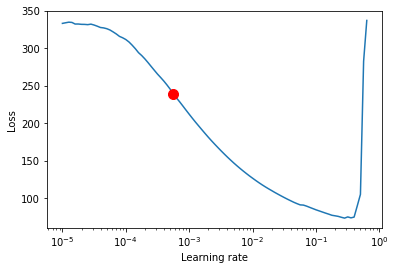

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(net, train_dataloader=train_dataloader, val_dataloaders=val_dataloader, min_lr=1e-5)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()
learing_rate1=res.suggestion()

In [ ]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=20, verbose=True, mode="min")
trainer = pl.Trainer(
    max_epochs=500,
    gpus=1,
    weights_summary="top",
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=30,
)


net = NBeats.from_dataset(
    training,
    learning_rate= learing_rate1, 
    log_interval=10,
    log_val_interval=1,
    weight_decay=1e-2,
    widths=[256, 2048],
    backcast_loss_ratio=1.0,#기본값 0.0
)

trainer.fit(
    net,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 9.3 M 
-----------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.057    Total estimated model params size (MB)


Global seed set to 42


Metric val_loss improved. New best score: 85.834


Metric val_loss improved by 6.508 >= min_delta = 0.0001. New best score: 79.326


Metric val_loss improved by 0.137 >= min_delta = 0.0001. New best score: 79.190


Metric val_loss improved by 7.375 >= min_delta = 0.0001. New best score: 71.814


Metric val_loss improved by 1.220 >= min_delta = 0.0001. New best score: 70.595


Metric val_loss improved by 3.338 >= min_delta = 0.0001. New best score: 67.257


Metric val_loss improved by 1.794 >= min_delta = 0.0001. New best score: 65.462


Monitored metric val_loss did not improve in the last 20 records. Best score: 65.462. Signaling Trainer to stop.


Compare below with baseline error(MAE):
tensor(8465.1035)
Compare below with baseline error(SMAPE):
tensor(0.2223)
Baseline error was(SMAPE):
tensor(0.2094)


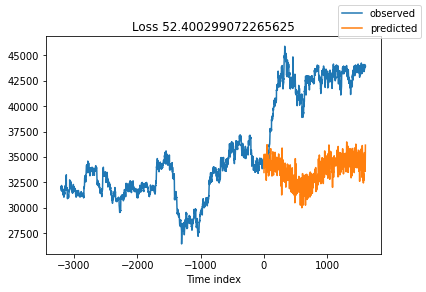

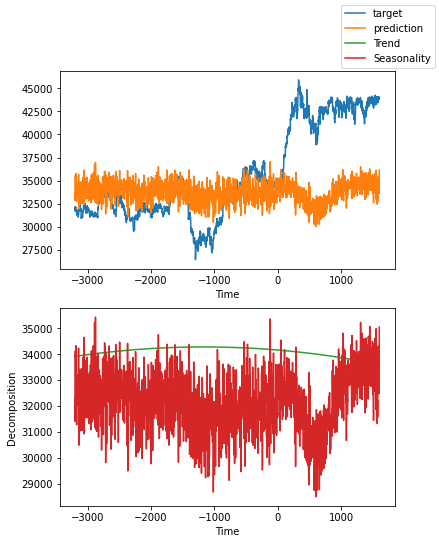

In [ ]:
import matplotlib.pyplot as plt

directory="/content/drive/MyDrive/Colab Notebooks/임시"

best_model_path = trainer.checkpoint_callback.best_model_path
best_model = NBeats.load_from_checkpoint(best_model_path)

#########################val###############################

actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_model.predict(val_dataloader)

print("Compare below with baseline error(MAE):")
print((actuals - predictions).abs().mean())
print("Compare below with baseline error(SMAPE):")
val_E=SMAPE()(predictions, actuals)
print(val_E)
print("Baseline error was(SMAPE):")
print(baseline_error)

raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)



for idx in range(1):  # plot 1 example
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    cur_plot = best_model.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True, ax=ax)
    cur_plot.savefig(directory+jongmoc+"nbeats_VAL"+str(idx)+"("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+",E:"+str(val_E)+".png", dpi=300)

for idx in range(1):  # plot 10 examples
    cur_plot = best_model.plot_interpretation(x, raw_predictions, idx=idx);
    cur_plot.savefig(directory+jongmoc+"nbeats_VAL_interpretation"+str(idx)+"("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+",E:"+str(val_E)+".png", dpi=300)

#########################val###############################


In [ ]:
########################test###############################


encoder_data = real_data[-4800:-1600]
decoder_data = real_data[-1600:-800]
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index = True)
new_raw_predictions, new_x = best_model.predict(new_prediction_data, mode="raw", return_x=True)

test_E=SMAPE()(new_raw_predictions['prediction'], new_x['decoder_target'])
print(test_E)

#최근 데이터+모르는 미래의 3개월 데이터 그래프
cur_plot = best_model.plot_prediction(new_x, new_raw_predictions, show_future_observed=False)
cur_plot.savefig(directory+jongmoc+"nbeats_TEST("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+".png", dpi=300)
#plt.close(cur_plot)

interpret_plot = best_model.plot_interpretation(new_x, new_raw_predictions, idx=0)
interpret_plot.savefig(directory+jongmoc+"nbeats_TEST_interpret("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+".png", dpi=300)
#plt.close(interpret_plot)

A_1=new_raw_predictions['prediction'][0].tolist() #3개월 예측값
A=[]
for i in range(3200): # 1년치는 none
  A.append(None)
A_1= A+A_1
          
B_1=[]
B_1=real_data['Open'][-4800:-800]

C = real_data['Date'][-4800:-800] #1년 날짜에 생성한 날짜 이어 붙여줌


dataframe = {'Date':C, '실제 시가':B_1, '예측 시가': A_1}
#new_prediction_data
Df1 = pd.DataFrame(dataframe)
Df1.Date

#날짜 넣어서 그리기
#성능 확인용 
#fig = plt.figure()
ax=Df1.plot(x='Date', y='실제 시가')
cur_plot = Df1.plot(x='Date', y='예측 시가', color='red', title = jongmoc_name, ax=ax, xlabel ="날짜", ylabel="시가")

fig = plt.gcf()
fig.savefig(directory+jongmoc+"DATE_test_nbeats_performance("+str(max_encoder_length)+", "+str(max_prediction_length)+").png", dpi=300)


#csv로 저장 뒤에 예측기간 만큼 행추가됨(추가된 데이터에서 타겟 변수 말고 다른 변수들은 제일 마지막 데이터 복붙임, 아직 date가 30분 간격이 아니고 1일 간격으로 저장된다)
Df1.to_csv(directory+jongmoc+"n_beats_test_performance_("+str(max_encoder_length)+", "+str(max_prediction_length)+").csv", mode="w")
########################test###############################

AssertionError: ignored

tensor(0.1878)


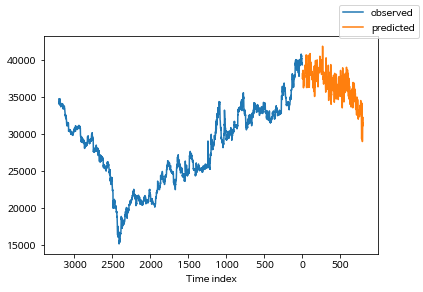

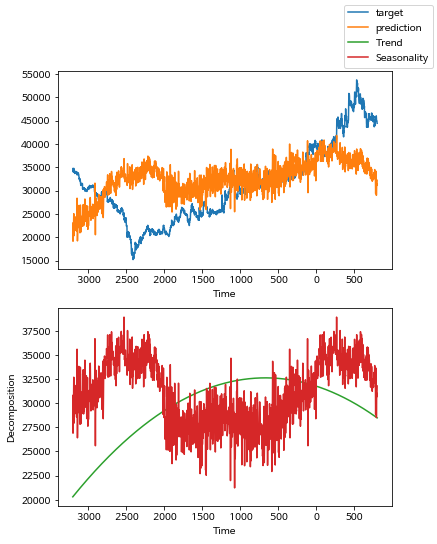

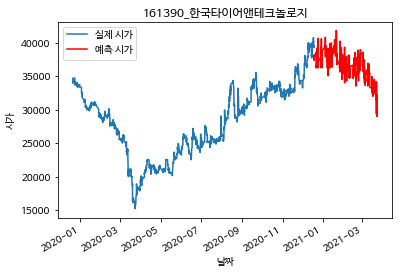

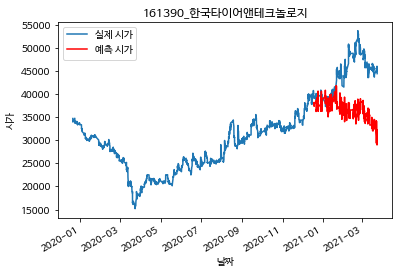

In [ ]:
######################################진짜 예측#############################################
encoder_data = real_data[-4000:-800]
decoder_data = real_data[-800:]
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index = True)
new_raw_predictions, new_x = best_model.predict(new_prediction_data, mode="raw", return_x=True)

pre_E=SMAPE()(new_raw_predictions['prediction'], new_x['decoder_target'])
print(pre_E)

#최근 데이터
cur_plot = best_model.plot_prediction(new_x, new_raw_predictions, show_future_observed=False)
cur_plot.savefig(directory+jongmoc+"nbeats_PRE("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+".png", dpi=300)
#plt.close(cur_plot)

interpret_plot = best_model.plot_interpretation(new_x, new_raw_predictions, idx=0)
interpret_plot.savefig(directory+jongmoc+"nbeats_PRE_interpret("+str(max_encoder_length)+", "+str(max_prediction_length)+"),B:"+str(batch_size)+",LR:"+str(learing_rate1)+".png", dpi=300)
#plt.close(interpret_plot)

a_1=new_raw_predictions['prediction'][0].tolist() #3개월 예측값
a=[]
for i in range(3200): # 1년치는 none
  a.append(None)
a_1= a+a_1
"""         
b_1=[]
b_1=real_data['Open'][-4000:] #1년치 시가
"""
b_1=[]
b_1=real_data['Open'][-4000:-800] #1년치 시가
for i in range(800):
      b_1.append(None) #3개월 예측은 None
 
date_list=[]
date_list= real_data['Date'][-4000:]
#date_list=date_list.tolist()

dataframe = {'Date':date_list, '실제 시가':b_1, '예측 시가': a_1}
#new_prediction_data
df1 = pd.DataFrame(dataframe)

#유저에게 보여주는 예측 플랏
ax=df1.plot(x='Date', y='실제 시가')
cur_plot = df1.plot(x='Date', y='예측 시가', color='red', title = jongmoc_name, ax=ax, xlabel ="날짜", ylabel="시가")
fig = plt.gcf()
fig.savefig(directory+jongmoc+"DATE_nbeats_prediction("+str(max_encoder_length)+", "+str(max_prediction_length)+").png", dpi=300)


b_2=[]
b_2=real_data['Open'][-4000:] #1년치 시가
dataframe2 = {'Date':date_list, '실제 시가':b_2, '예측 시가': a_1}
#new_prediction_data
df2 = pd.DataFrame(dataframe2)

#유저에게 보여주는 예측+정답
ax=df2.plot(x='Date', y='실제 시가')
cur_plot = df2.plot(x='Date', y='예측 시가', color='red', title = jongmoc_name, ax=ax, xlabel ="날짜", ylabel="시가")
fig = plt.gcf()
fig.savefig(directory+jongmoc+"DATE_nbeats_prediction_REAL("+str(max_encoder_length)+", "+str(max_prediction_length)+").png", dpi=300)

######################csv저장에는 실제 시가 4000행 다 넣어줌, 대시보드 그래프 그릴떄 예측기간의 실제 시가 안보여줄려면 수정 필요
#csv로 저장 뒤에 예측기간 만큼 행추가됨
df2.to_csv(directory+jongmoc+"n_beats_prediction_("+str(max_encoder_length)+", "+str(max_prediction_length)+").csv", mode="w")
######################################진짜 예측#############################################

In [ ]:
###csv로 smape 계산
print((2*(Df1['실제 시가'][-800:] - Df1['예측 시가'][-800:]).abs() / (Df1['실제 시가'][-800:].abs() + Df1['예측 시가'][-800:].abs())).mean())

NameError: name 'Df1' is not defined